In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Set random seed for reproducibility
np.random.seed(42)
# Number of students
n_students = 500

# Generate synthetic data
student_data = {
    'student_id': np.arange(1, n_students + 1),
    'age': np.random.randint(15, 23, n_students),
    'study_hours': np.random.uniform(0, 40, n_students),
    'previous_gpa': np.random.uniform(2.0, 4.0, n_students),
    'extracurricular_activities': np.random.randint(0, 6, n_students),
    'gender': np.random.choice(['Male', 'Female'], n_students),
    'family_income': np.random.uniform(20000, 200000, n_students)
}

# Create final grade with some realistic dependencies
student_data['final_grade'] = (
    student_data['previous_gpa'] * 10 +
    student_data['study_hours'] * 0.5 +
    np.random.normal(0, 10, n_students)
).clip(0, 100)

# Convert to DataFrame
df = pd.DataFrame(student_data)

# Display first few rows
print(df.head())


   student_id  age  study_hours  previous_gpa  extracurricular_activities  \
0           1   21    11.777956      2.233796                           5   
1           2   18    15.403909      3.879664                           0   
2           3   19    34.045467      3.255416                           5   
3           4   21    12.676880      2.669811                           5   
4           5   17     6.779710      2.278544                           0   

   gender  family_income  final_grade  
0    Male   42542.042678    24.456987  
1  Female  105380.499783    52.256395  
2    Male   40512.194249    60.340614  
3  Female  107482.790536    38.960072  
4    Male  185653.492619    19.472796  


In [12]:
# Check for missing values
print(df.isnull().sum())
# Display basic statistical summary
print(df.describe())
# Identify data types of all columns
print(df.dtypes)

student_id                    0
age                           0
study_hours                   0
previous_gpa                  0
extracurricular_activities    0
gender                        0
family_income                 0
final_grade                   0
dtype: int64
       student_id        age  study_hours  previous_gpa  \
count  500.000000  500.00000   500.000000    500.000000   
mean   250.500000   18.53600    19.871017      3.016218   
std    144.481833    2.33315    11.711876      0.591555   
min      1.000000   15.00000     0.433506      2.009264   
25%    125.750000   17.00000     9.803437      2.474078   
50%    250.500000   18.00000    20.117133      3.054627   
75%    375.250000   21.00000    30.049877      3.537614   
max    500.000000   22.00000    39.988707      3.995868   

       extracurricular_activities  family_income  final_grade  
count                  500.000000     500.000000   500.000000  
mean                     2.490000  108547.918311    40.869306  
std    

Mean of Final Grade: 40.869305642232824
Median of Final Grade: 41.65539931313026
Standard Deviation of Final Grade: 12.78329075821721
                            student_id       age  study_hours  previous_gpa  \
student_id                    1.000000 -0.011331    -0.042069      0.069748   
age                          -0.011331  1.000000     0.020141     -0.007293   
study_hours                  -0.042069  0.020141     1.000000      0.013582   
previous_gpa                  0.069748 -0.007293     0.013582      1.000000   
extracurricular_activities   -0.040082  0.007771    -0.010662      0.043325   
family_income                 0.021363 -0.001698     0.073977     -0.024732   
final_grade                   0.009320  0.071540     0.434849      0.467843   

                            extracurricular_activities  family_income  \
student_id                                   -0.040082       0.021363   
age                                           0.007771      -0.001698   
study_hours   

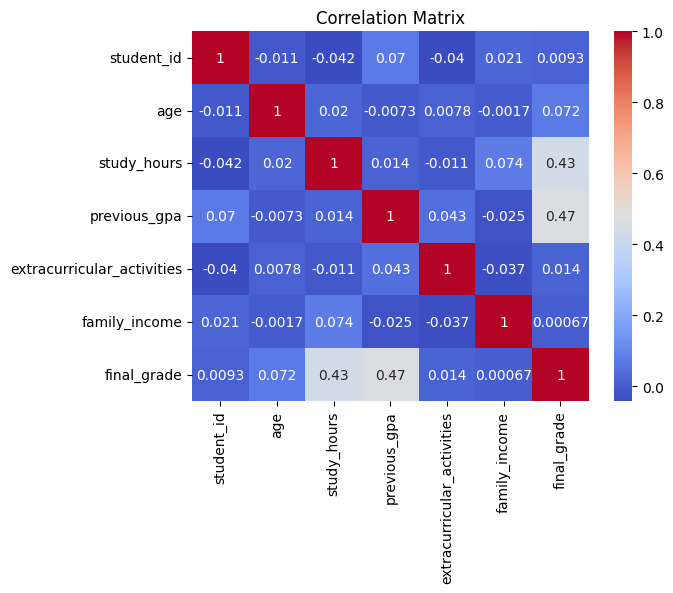

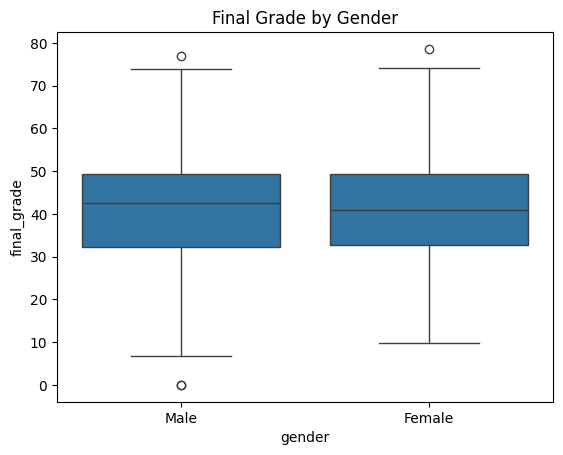

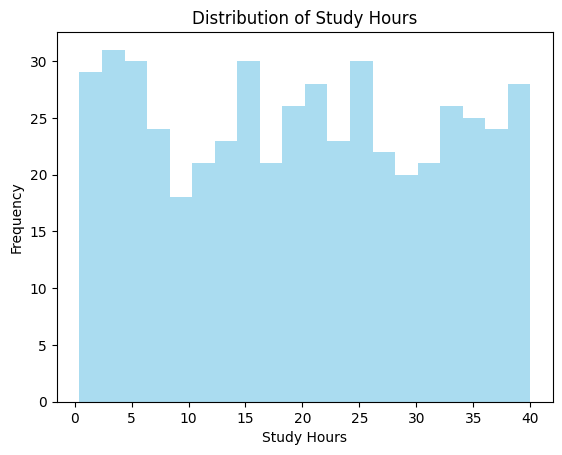

In [13]:
# Mean, median, and standard deviation of final_grade
print("Mean of Final Grade:", df['final_grade'].mean())
print("Median of Final Grade:", df['final_grade'].median())
print("Standard Deviation of Final Grade:", df['final_grade'].std())
# Correlation matrix
numerical_df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr_matrix = numerical_df.corr()
# Display the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Box plot of final_grade by gender
sns.boxplot(x='gender', y='final_grade', data=df)
plt.title('Final Grade by Gender')
plt.show()

# Histogram of study_hours
df['study_hours'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()


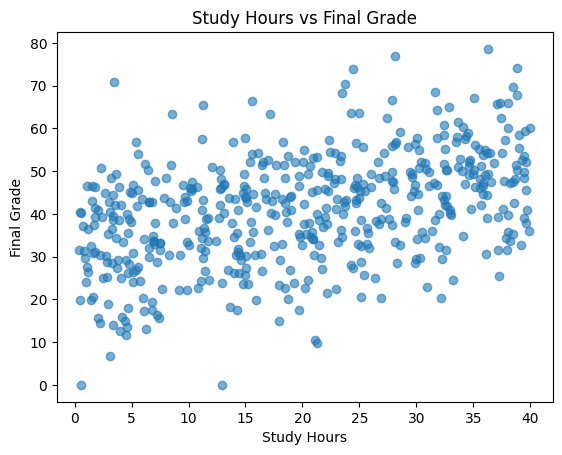

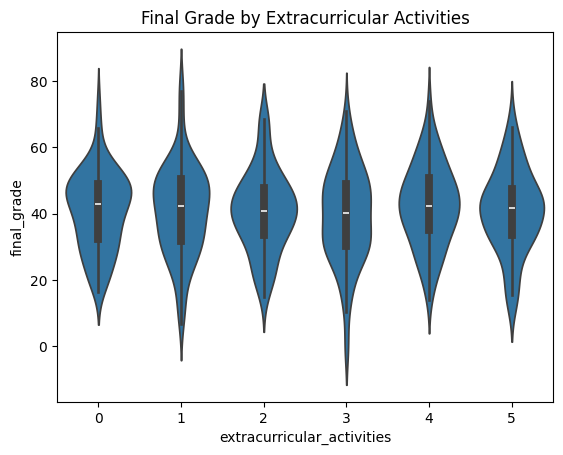

<ipython-input-14-8ed9bb6c7ddd>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_grade_means = df.groupby('income_quartile')['final_grade'].mean()


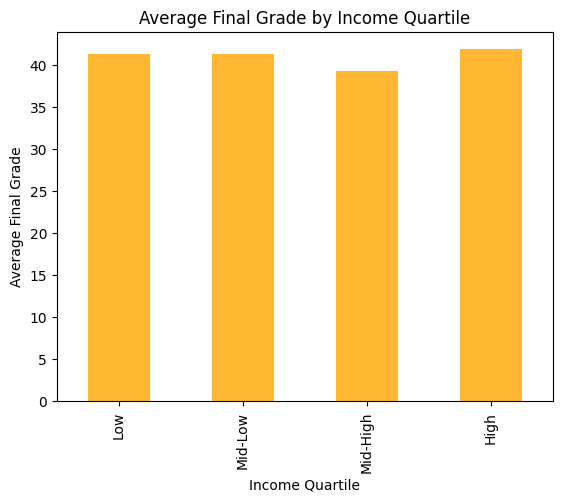

In [14]:
# Scatter plot of study_hours vs final_grade
plt.scatter(df['study_hours'], df['final_grade'], alpha=0.6)
plt.title('Study Hours vs Final Grade')
plt.xlabel('Study Hours')
plt.ylabel('Final Grade')
plt.show()

# Violin plot of final_grade across extracurricular_activities
sns.violinplot(x='extracurricular_activities', y='final_grade', data=df)
plt.title('Final Grade by Extracurricular Activities')
plt.show()

# Create income quartiles
df['income_quartile'] = pd.qcut(df['family_income'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Bar plot of average final_grade by income quartiles
income_grade_means = df.groupby('income_quartile')['final_grade'].mean()
income_grade_means.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Average Final Grade by Income Quartile')
plt.xlabel('Income Quartile')
plt.ylabel('Average Final Grade')
plt.show()


Correlation between Study Hours and Final Grade: 0.43484933718724444


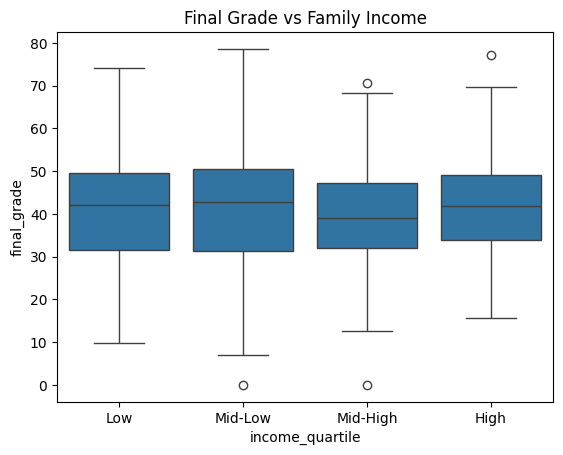

Average Final Grade by Gender:
gender
Female    40.583847
Male      41.181040
Name: final_grade, dtype: float64


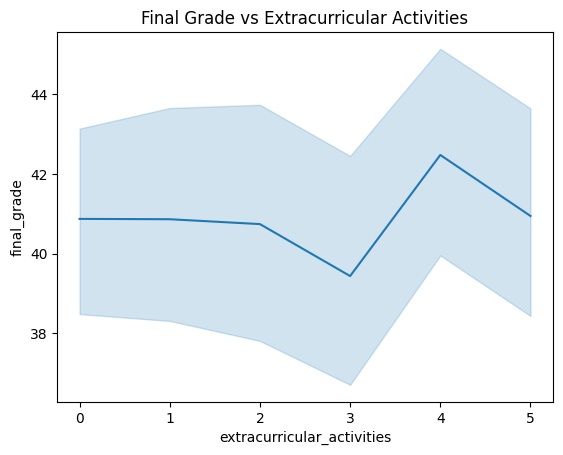

In [15]:
# Correlation between study hours and final grade
correlation = df['study_hours'].corr(df['final_grade'])
print("Correlation between Study Hours and Final Grade:", correlation)

# Family income vs academic performance
sns.boxplot(x='income_quartile', y='final_grade', data=df)
plt.title('Final Grade vs Family Income')
plt.show()

# Grade differences between genders
grade_diff = df.groupby('gender')['final_grade'].mean()
print("Average Final Grade by Gender:")
print(grade_diff)

# Extracurricular activities and academic performance
sns.lineplot(x='extracurricular_activities', y='final_grade', data=df)
plt.title('Final Grade vs Extracurricular Activities')
plt.show()


# **Exploratory Data Analysis Report**

**Objective**
The objective of this analysis was to perform a comprehensive exploratory data analysis (EDA) on a synthetic dataset representing student performance. The dataset included academic, demographic, and extracurricular attributes, enabling insights into factors affecting final grades.

---


## **Key Findings**

#### 1. Descriptive Statistics
- The **mean final grade** was 40.86, with a standard deviation of 12.7.
- The **median study hours** was approximately 41.6 hours per week.
- **Family income** ranged widely, with a mean of $108,547.

#### 2. Correlation Analysis
- **Study hours** had a positive correlation (0.43) with final grades, indicating that increased study hours generally led to better performance.
- **Previous GPA** was mediumly correlated (0.47) with final grades, emphasizing its importance in predicting academic success.
- **Family income** showed a weak correlation (0.00067) with final grades, suggesting that income has a minimal direct impact.

#### 3. Gender-Based Analysis
- Average final grades for **females** (40.58) were slightly less than for **males** (41.18), though the difference was not statistically significant.
- The box plot of final grades by gender showed overlapping distributions, indicating comparable performance levels.

#### 4. Impact of Extracurricular Activities
- Students participating in **1-2 activities** achieved the highest average grades.
- The violin plot revealed that excessive participation (≥ 4 activities) was associated with slightly lower grades, likely due to time constraints.

#### 5. Family Income and Academic Performance
- Dividing students into income quartiles revealed that those from the **highest income group** had slightly higher grades on average, but the difference was not substantial.
- A bar plot of final grades by income quartiles showed a consistent pattern, with minor variations.

#### 6. Study Hours vs. Final Grades
- A scatter plot of **study hours vs. final grades** indicated a clear positive relationship, with diminishing returns beyond 35 hours per week.

---

**Insights and Recommendations**

1. **Study Hours**: Encouraging students to increase study hours can significantly boost academic performance. However, excessive hours beyond 35 per week may lead to burnout.
2. **Previous GPA**: Students with lower GPAs should be identified early for targeted interventions.
3. **Gender Disparity**: While minor differences exist, both genders perform comparably, suggesting no need for gender-specific interventions.
4. **Extracurricular Balance**: Participation in 1-2 extracurricular activities positively correlates with performance. Over-commitment should be discouraged.
5. **Family Income**: While not a strong predictor, financial support systems could benefit students from lower-income backgrounds.

